## Multivariate Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [3]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

In [4]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

With initial theta values of [0. 0.], cost error is 24448949404.289967


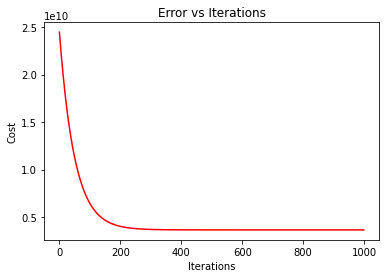

With final theta values of [201966.01949736  28614.7137147 ], cost error is 3642698150.2527704


In [5]:
def run():
    data = pd.read_csv('house_price.csv')

    X = data['room_size']
    y = data['property_value']

    X = (X - X.mean()) / X.std()

    X = np.c_[np.ones(X.shape[0]), X] 

    alpha = 0.01
    iterations = 1000
    theta = np.zeros(X.shape[1])
    initial_cost, _ = cost_function(X, y, theta)

    print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))
    theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)

    plotChart(iterations, cost_num)
    
    

    final_cost, _ = cost_function(X, y, theta)

    print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

if __name__ == "__main__":
    run()